## Big Data Final Project Code
### Team Algorythms - Abhilash, Shalagha, Stuti, Avani

### Data Extraction

#### Extracting the price of the green bonds using the Alphavantage API

In [375]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd

# Replace 'YOUR_API_KEY' with your actual API key from Alpha Vantage
api_key = '89W5AT1E5214I8KM'

# List of green bond ETF symbols
green_bond_etfs = ['BGRN'] # You can add more symbols like 'GRNB', 'CBND'

# Create a TimeSeries object with your API key
ts = TimeSeries(key=api_key, output_format='pandas')

# Function to fetch data for a given ETF and return it as a DataFrame
def fetch_etf_data(symbol):
    data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
    data['symbol'] = symbol
    return data

# Fetch data for each green bond ETF and store it in a list
etf_dataframes = [fetch_etf_data(etf) for etf in green_bond_etfs]

# Concatenate all the dataframes into a single dataframe
all_etf_data = pd.concat(etf_dataframes)

all_etf_data.reset_index(inplace = True)

# Display the first few rows of the combined dataframe
display(all_etf_data.head())

date  1. open  2. high   3. low  4. close  5. volume symbol
0 2024-06-07    46.47    46.60  46.4200     46.42    15094.0   BGRN
1 2024-06-06    46.67    46.72  46.6399     46.72    17276.0   BGRN
2 2024-06-05    46.66    46.74  46.5200     46.74    24828.0   BGRN
3 2024-06-04    46.56    46.67  46.5130     46.63    23247.0   BGRN
4 2024-06-03    46.32    46.49  46.3200     46.45    14563.0   BGRN

In [376]:
#Filtering the bond data for specific dates
all_etf_data_v2 = all_etf_data[(all_etf_data['date'] >= '2024-01-01') & (all_etf_data['date'] <= '2024-03-31')]
all_etf_data_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 49 to 109
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       61 non-null     datetime64[ns]
 1   1. open    61 non-null     float64       
 2   2. high    61 non-null     float64       
 3   3. low     61 non-null     float64       
 4   4. close   61 non-null     float64       
 5   5. volume  61 non-null     float64       
 6   symbol     61 non-null     object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 3.8+ KB


In [377]:
#Storing the data in a csv file
#all_etf_data_v2.to_csv('bond_data.csv')

#### Extracting weather data from Visual crossing API

In [378]:
import requests
import pandas as pd

# Define the function to get historical weather data for a single location
def get_historical_weather_data(url):
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        days = data['days']
        weather_data = []
        for day in days:
            day_data = {
                "location": data['resolvedAddress'],
                "datetime": day.get('datetime'),
                "tempmax": day.get('tempmax'),
                "tempmin": day.get('tempmin'),
                "temp": day.get('temp'),
                "feelslikemax": day.get('feelslikemax'),
                "feelslikemin": day.get('feelslikemin'),
                "feelslike": day.get('feelslike'),
                "dew": day.get('dew'),
                "humidity": day.get('humidity'),
                "precip": day.get('precip'),
                "precipprob": day.get('precipprob'),
                "precipcover": day.get('precipcover'),
                "preciptype": day.get('preciptype'),
                "snow": day.get('snow'),
                "snowdepth": day.get('snowdepth'),
                "windgust": day.get('windgust'),
                "windspeed": day.get('windspeed'),
                "winddir": day.get('winddir'),
                "pressure": day.get('pressure'),
                #"cloudcover": day.get('cloudcover'),
                "visibility": day.get('visibility'),
                "solarradiation": day.get('solarradiation'),
                "solarenergy": day.get('solarenergy'),
                "uvindex": day.get('uvindex'),
                "sunrise": day.get('sunrise'),
                "sunriseEpoch": day.get('sunriseEpoch'),
                "sunset": day.get('sunset'),
                "sunsetEpoch": day.get('sunsetEpoch'),
                "moonphase": day.get('moonphase'),
                "conditions": day.get('conditions'),
                "description": day.get('description'),
                "icon": day.get('icon'),
                "stations": day.get('stations')
            }
            weather_data.append(day_data)
        return pd.DataFrame(weather_data)
    else:
        print(f"Failed to get data for URL: {url}")
        print(f"Status Code: {response.status_code}")
        print(f"Response Content: {response.content}")
        return None

# Define the locations
locations = ["London,UK", "New York,US", "Tokyo,JP", "Sydney,AU", "Paris,FR"]

# Define the base URL and API key
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline"
api_key = "A6YZJU43VRD7E8KFWLHQWZ4AY"

# Collect data from all locations
all_weather_data = []

for location in locations:
    url = f"{base_url}/{location}/last365days?key={api_key}&include=days"
    weather_df = get_historical_weather_data(url)
    if weather_df is not None:
        all_weather_data.append(weather_df)

# Concatenate all data into a single DataFrame
if all_weather_data:
    aggregated_weather_df = pd.concat(all_weather_data, ignore_index=True)
    # Group by datetime and aggregate the data
    aggregated_weather_df['datetime'] = pd.to_datetime(aggregated_weather_df['datetime'])
    date_level_agg = aggregated_weather_df.groupby('datetime').agg({
        'tempmax': 'mean',
        'tempmin': 'mean',
        'temp': 'mean',
        'feelslikemax': 'mean',
        'feelslikemin': 'mean',
        'feelslike': 'mean',
        'dew': 'mean',
        'humidity': 'mean',
        'precip': 'sum',
        'precipprob': 'mean',
        'precipcover': 'mean',
        'snow': 'sum',
        'snowdepth': 'mean',
        'windgust': 'mean',
        'windspeed': 'mean',
        'winddir': 'mean',
        'pressure': 'mean',
        #'cloudcover': 'mean',
        'visibility': 'mean',
        'solarradiation': 'mean',
        'solarenergy': 'mean',
        'uvindex': 'mean',
        'moonphase': 'mean'
    }).reset_index()
    
    # Display the aggregated weather data
    display(date_level_agg.head())
else:
    print("No data was retrieved from the provided locations.")


#aggregated_weather_df.to_csv('aggregated_weather_df.csv')


datetime  tempmax  tempmin   temp  feelslikemax  feelslikemin  feelslike  \
0 2023-06-07    71.70    59.00  65.10         71.70         59.00      65.10   
1 2023-06-08    74.20    58.06  65.82         74.08         58.06      65.78   
2 2023-06-09    75.32    58.32  66.62         74.88         58.14      66.48   
3 2023-06-10    78.54    59.72  68.52         78.16         59.16      68.42   
4 2023-06-11    76.68    61.36  68.26         76.40         60.88      68.10   

     dew  humidity  precip  ...  snowdepth  windgust  windspeed  winddir  \
0  43.60     46.20   0.000  ...        0.0     25.30       8.20   293.70   
1  52.84     65.34   0.011  ...        0.0     26.02      11.98   182.12   
2  53.56     65.70   1.206  ...        0.0     25.68      12.12   216.02   
3  55.34     65.26   0.014  ...        0.0     25.02      10.98   191.82   
4  58.14     72.30   1.283  ...        0.0     22.80      10.56   167.62   

   pressure  visibility  solarradiation  solarenergy  uvindex  moonphase  
0   1003.90        4.20          164.20        14.20      6.0      0.630  
1   1013.24       10.72          165.24        14.22      7.0      0.648  
2   1010.42        9.90          142.14        12.22      6.4      0.688  
3   1013.28       10.36          168.56        14.50      7.2      0.734  
4   1014.96        9.60          140.08        12.10      5.8      0.758  

[5 rows x 23 columns]

In [379]:
#Storing the data in a csv file
#date_level_agg.to_csv('date_level_agg.csv')

In [380]:
#Filtering the data for a specific time period
date_level_agg_v2 = date_level_agg[(date_level_agg['datetime']>='2024-01-01') & (date_level_agg['datetime']<='2024-03-31')]

In [381]:
#Storing the data in a csv file
#date_level_agg_v2.to_csv('weather_data.csv')

### Feature Engineering

##### Extracting features like Dust_Haze count, Manmade count, Sea_Lake_Ice count, Severe_Storm count, Snow count, Volcanoes count, Water_Color count, Wildfire count using Image data from NASA

##### Illustration shown below for an image from 20th Feb 2024

##### Input Image

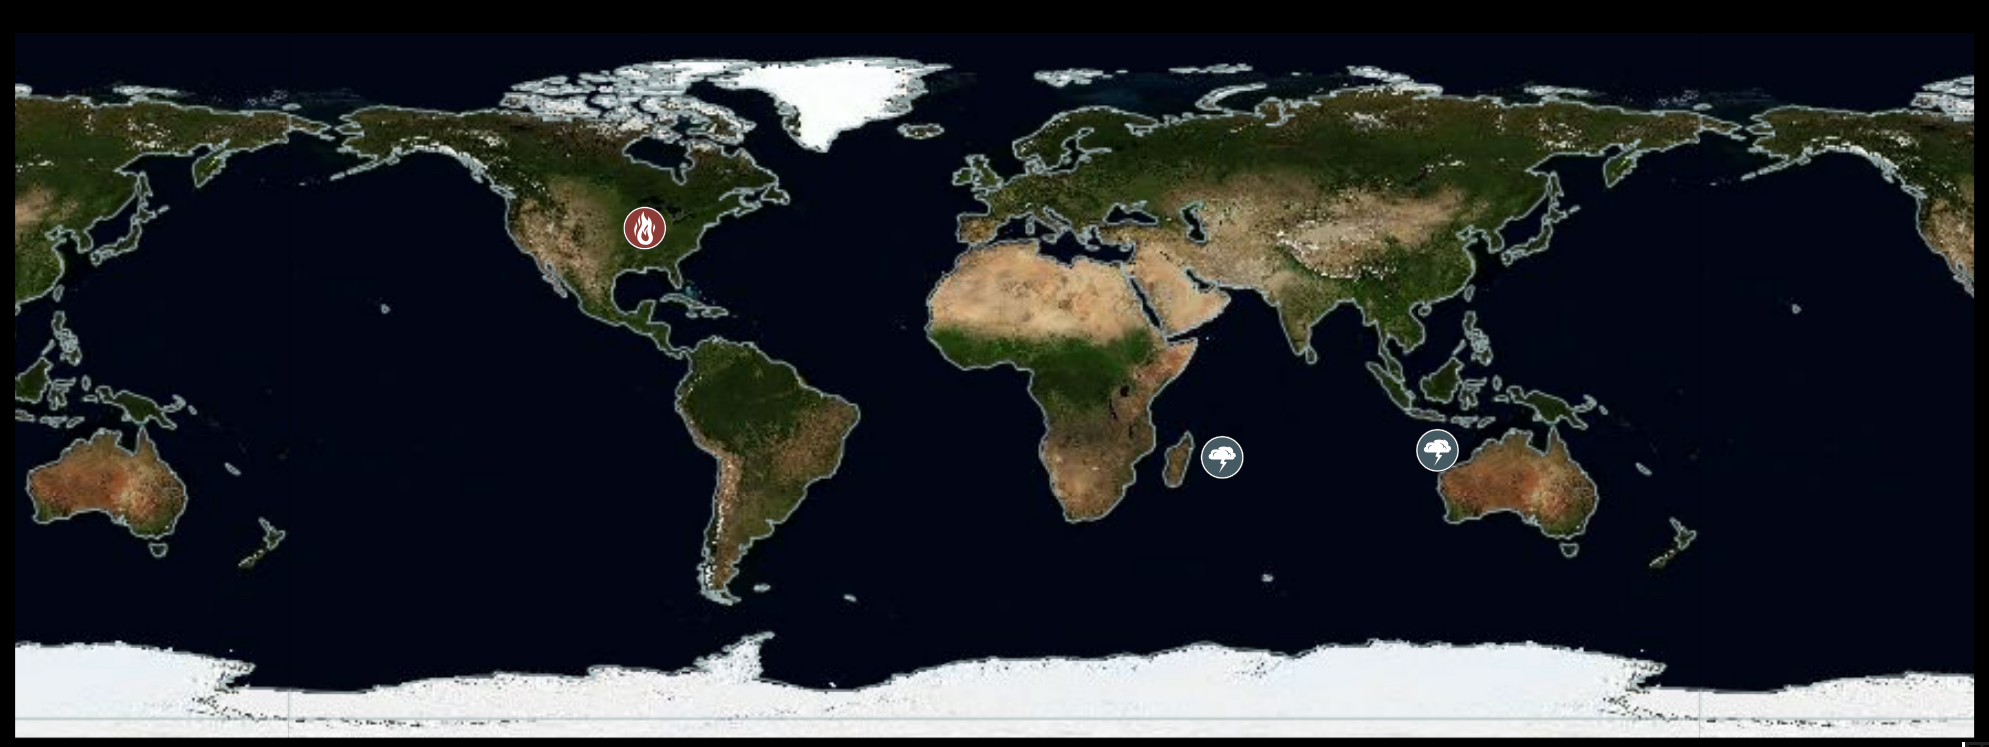

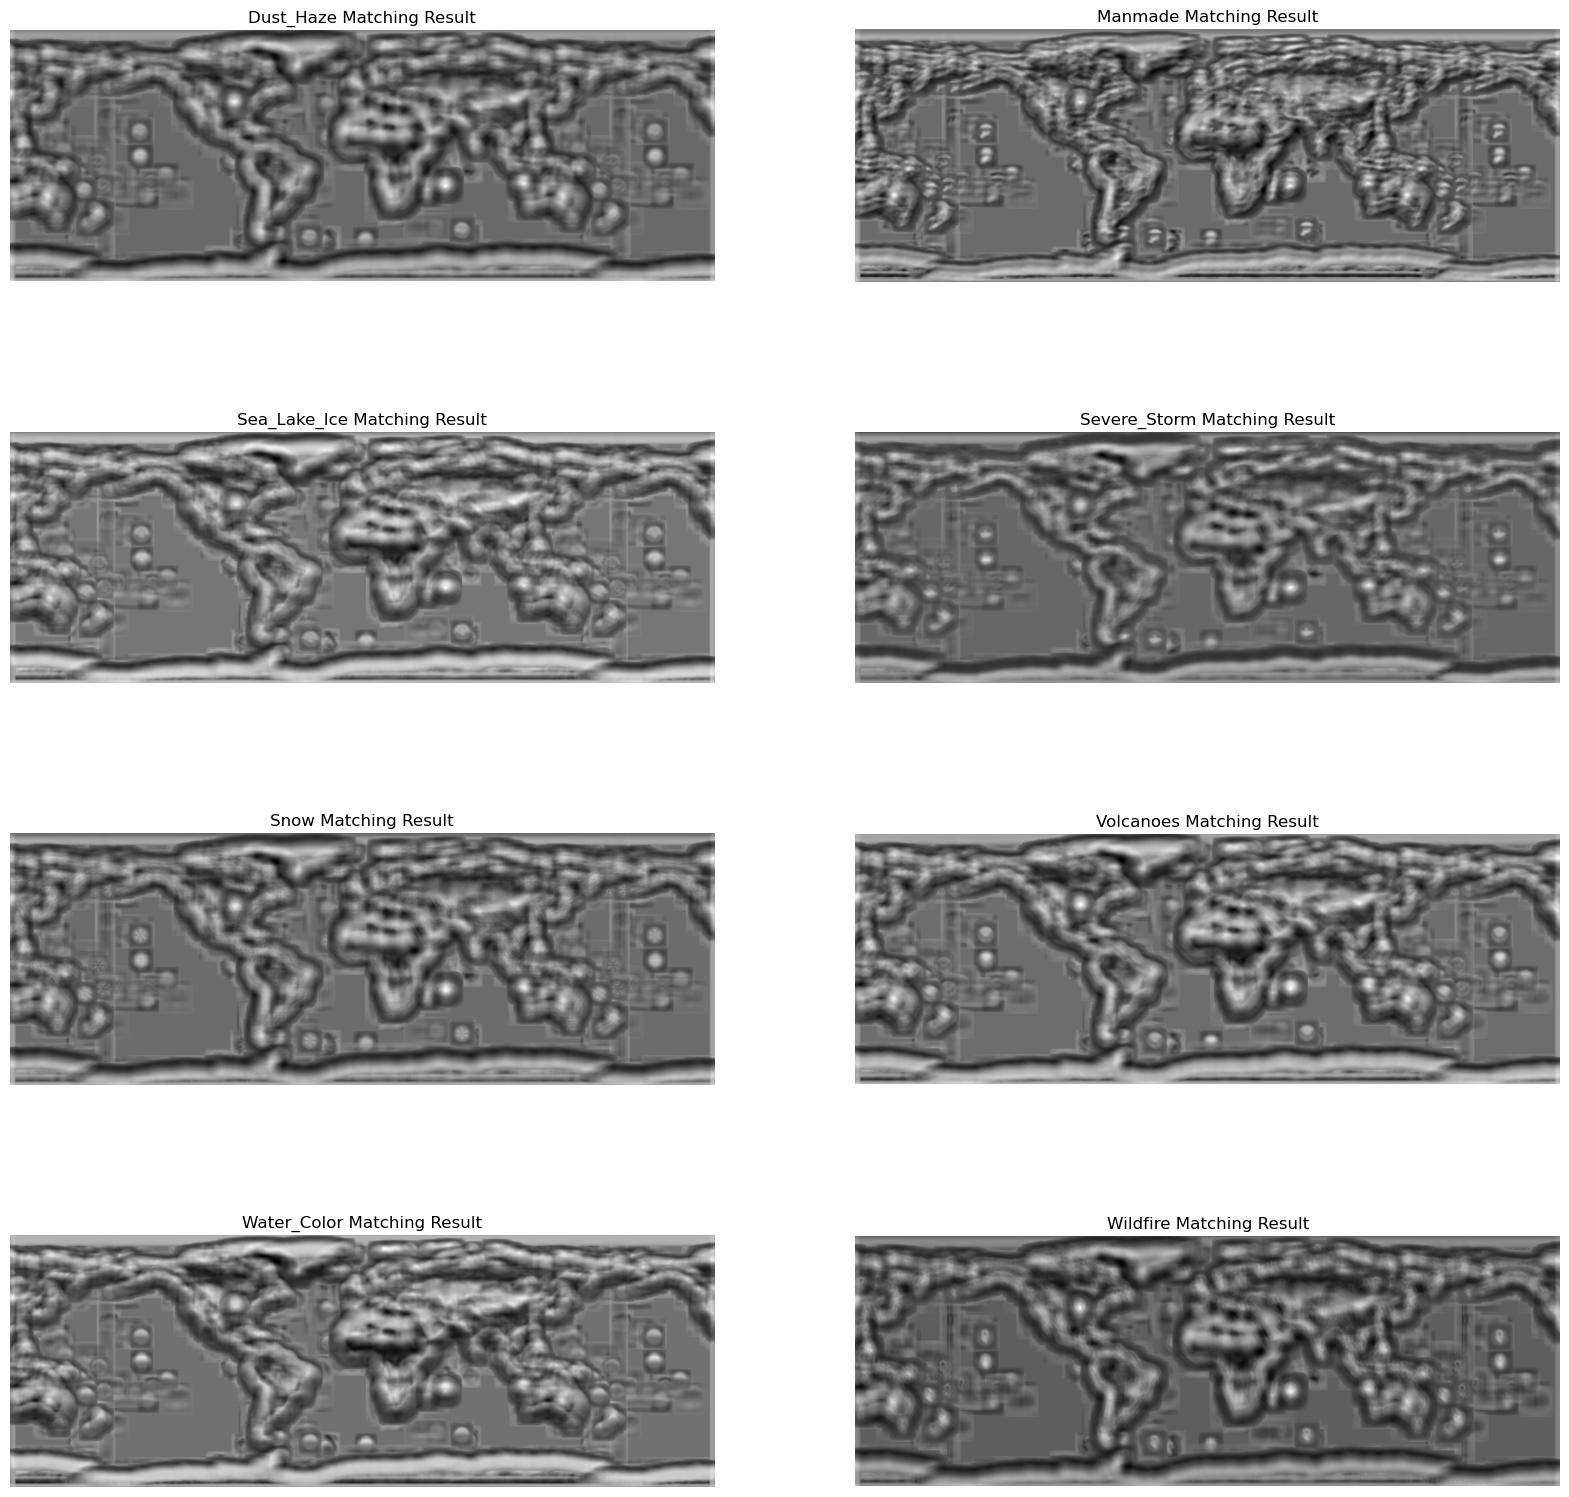

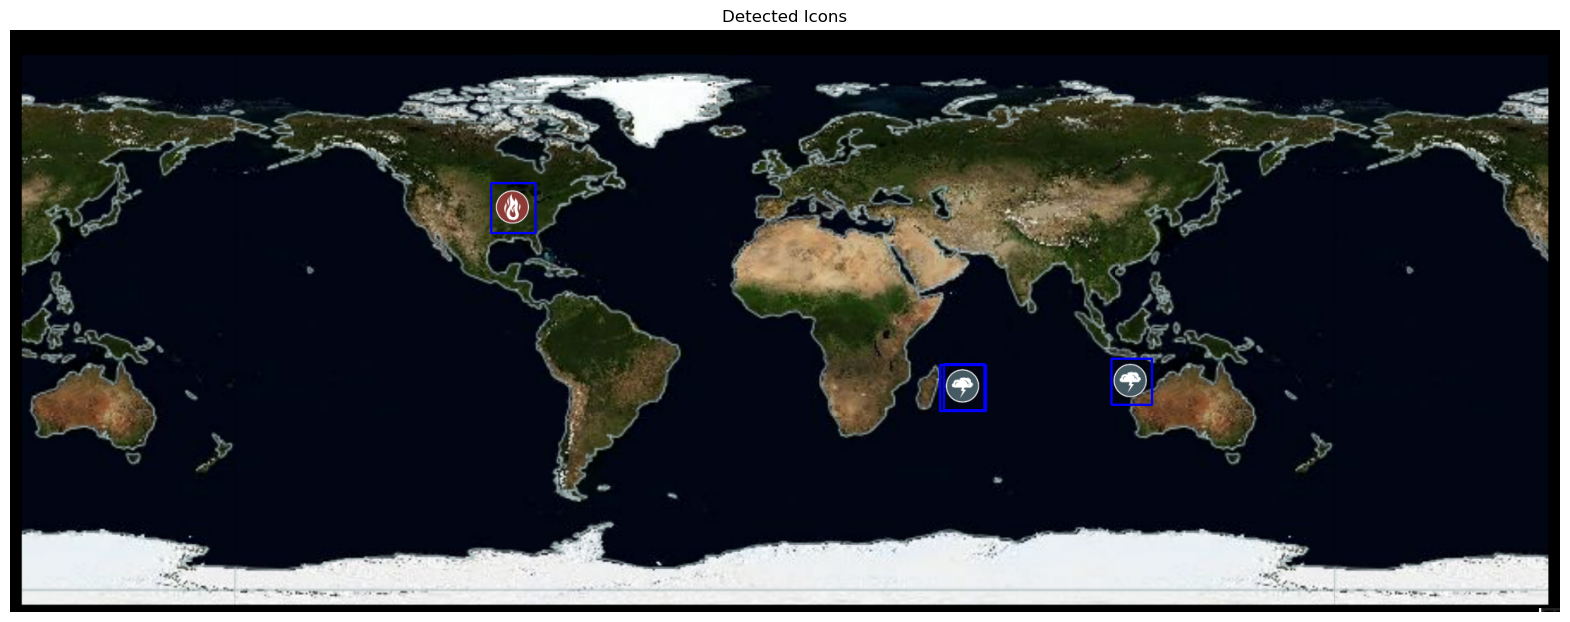

In [382]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the main image and the icons in color
main_image_path = "./data/natural_calamities/2024-02-20.png"
icons_paths = {
    "Dust_Haze": "./data/Dust_Haze.png",
    "Manmade": "./data/Manmade.png",
    "Sea_Lake_Ice": "./data/Sea_Lake_Ice.png",
    "Severe_Storm": "./data/Severe_storm.png",
    "Snow": "./data/Snow.png",
    "Volcanoes": "./data/Volcanoes.png",
    "Water_Color": "./data/Water_Color.png",
    "Wildfire": "./data/wildfire.png"
}

main_image = cv2.imread(main_image_path)
icons = {name: cv2.imread(path) for name, path in icons_paths.items()}

# Check if images are loaded correctly
if main_image is None:
    raise IOError("Error loading main image.")
for name, icon in icons.items():
    if icon is None:
        raise IOError(f"Error loading {name} icon.")

# Function to perform template matching
def template_matching(main_img, template, threshold=0.7):
    result = cv2.matchTemplate(main_img, template, cv2.TM_CCOEFF_NORMED)
    loc = np.where(result >= threshold)
    return loc, result

# Perform template matching for each icon
matches = {}
for name, icon in icons.items():
    loc, result = template_matching(main_image, icon)
    matches[name] = {
        "locations": loc,
        "count": len(list(zip(*loc[::-1]))),
        "result": result
    }

# Non-maximum suppression to filter overlapping detections
def non_max_suppression_fast(boxes, overlap_thresh=0.3):
    if len(boxes) == 0:
        return []

    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")

    pick = []
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]

    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)

    while len(idxs) > 0:
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])

        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        overlap = (w * h) / area[idxs[:last]]

        idxs = np.delete(idxs, np.concatenate(([last], np.where(overlap > overlap_thresh)[0])))

    return boxes[pick].astype("int")

# Apply non-maximum suppression and update counts
for name, data in matches.items():
    loc = data["locations"]
    boxes = []
    for pt in zip(*loc[::-1]):
        boxes.append([pt[0], pt[1], pt[0] + icons[name].shape[1], pt[1] + icons[name].shape[0]])
    boxes = np.array(boxes)
    pick = non_max_suppression_fast(boxes)
    matches[name]["count"] = len(pick)
    matches[name]["boxes"] = pick

# Draw rectangles around matches for visualization
main_image_copy = main_image.copy()
for name, data in matches.items():
    for (x1, y1, x2, y2) in data["boxes"]:
        cv2.rectangle(main_image_copy, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Display the matching results for debugging
fig, axs = plt.subplots(4, 2, figsize=(20, 20))
for ax, (name, data) in zip(axs.ravel(), matches.items()):
    ax.imshow(data["result"], cmap='gray')
    ax.set_title(f'{name} Matching Result')
    ax.axis('off')
plt.show()

# Display the final image with matches
plt.figure(figsize=(20, 15))
plt.imshow(cv2.cvtColor(main_image_copy, cv2.COLOR_BGR2RGB))
plt.title('Detected Icons')
plt.axis('off')
plt.show()


#### Running a loop to extract features using images from 1st Jan to 31st Mar 2024

In [383]:
import cv2
import numpy as np
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Folder containing the images
image_folder_path = "./data/natural_calamities"  # Replace with your folder path

icons_paths = {
    "Dust_Haze": "./data/Dust_Haze.png",
    "Manmade": "./data/Manmade.png",
    "Sea_Lake_Ice": "./data/Sea_Lake_Ice.png",
    "Severe_Storm": "./data/Severe_storm.png",
    "Snow": "./data/Snow.png",
    "Volcanoes": "./data/Volcanoes.png",
    "Water_Color": "./data/Water_Color.png",
    "Wildfire": "./data/wildfire.png"
}

# Load icon images
icons = {name: cv2.imread(path) for name, path in icons_paths.items()}

# Function to perform template matching
def template_matching(main_img, template, threshold=0.7):
    result = cv2.matchTemplate(main_img, template, cv2.TM_CCOEFF_NORMED)
    loc = np.where(result >= threshold)
    return loc, result

# Non-maximum suppression to filter overlapping detections
def non_max_suppression_fast(boxes, overlap_thresh=0.3):
    if len(boxes) == 0:
        return []

    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")

    pick = []
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]

    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)

    while len(idxs) > 0:
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])

        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        overlap = (w * h) / area[idxs[:last]]

        idxs = np.delete(idxs, np.concatenate(([last], np.where(overlap > overlap_thresh)[0])))

    return boxes[pick].astype("int")

# Initialize DataFrame
columns = ["Date"] + list(icons.keys())
df = pd.DataFrame(columns=columns)

# Loop through images in the folder
for filename in os.listdir(image_folder_path):
    if filename.endswith(".png"):
        # Extract date from filename (assuming the format is 'YYYY-MM-DD.png')
        date_str = filename.split('.')[0]
        date = datetime.strptime(date_str, "%Y-%m-%d").date()

        # Load main image
        main_image_path = os.path.join(image_folder_path, filename)
        main_image = cv2.imread(main_image_path)

        # Check if the main image is loaded correctly
        if main_image is None:
            print(f"Error loading image {filename}")
            continue

        # Perform template matching and count icons
        counts = {}
        for name, icon in icons.items():
            loc, result = template_matching(main_image, icon)
            boxes = []
            for pt in zip(*loc[::-1]):
                boxes.append([pt[0], pt[1], pt[0] + icon.shape[1], pt[1] + icon.shape[0]])
            boxes = np.array(boxes)
            pick = non_max_suppression_fast(boxes)
            counts[name] = len(pick)

        # Add the counts to the DataFrame
        row = {"Date": date}
        row.update(counts)
        df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)

# Set 'Date' as the primary key
#df.set_index("Date", inplace=True)

# Display the DataFrame
print(df)

# Save the DataFrame to a CSV file
#df.to_csv("icon_counts.csv")


          Date Dust_Haze Manmade Sea_Lake_Ice Severe_Storm Snow Volcanoes  \
0   2024-01-01         0       0            0            1    0         0   
1   2024-01-02         0       0            0            1    0         0   
2   2024-01-03         0       0            0            1    0         0   
3   2024-01-04         3       0            4            1    3         3   
4   2024-01-05         0       0            0            0    0         0   
..         ...       ...     ...          ...          ...  ...       ...   
86  2024-03-27         0       0            0            1    0         0   
87  2024-03-28         1       0            1            1    0         1   
88  2024-03-29         6       0            8            0    2         7   
89  2024-03-30         0       0            0            0    0         0   
90  2024-03-31         0       0            0            0    0         0   

   Water_Color Wildfire  
0            0        0  
1            0        0

#### Extracting the cloud cover percentage feature

#### Illustration for an image

Cloud Cover Percentage: 26.51%


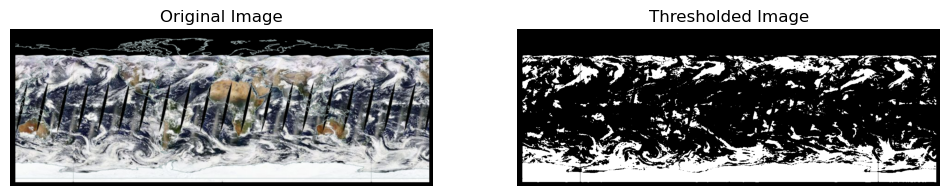

In [384]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = './data/cloud_cover/image.png'
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a threshold to segment clouds
_, thresholded = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# Calculate cloud cover percentage
cloud_pixels = np.sum(thresholded == 255)
total_pixels = thresholded.size
cloud_cover_percentage = (cloud_pixels / total_pixels) * 100

print(f"Cloud Cover Percentage: {cloud_cover_percentage:.2f}%")

# Plot the original and thresholded images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Thresholded Image')
plt.imshow(thresholded, cmap='gray')
plt.axis('off')

plt.show()


#### Running a loop to extract cloud cover percentage feature using images from 1st Jan to 31st Mar 2024

In [385]:
import cv2
import numpy as np
import pandas as pd
import os
from datetime import datetime

# Function to calculate cloud cover percentage
def calculate_cloud_cover(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresholded = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
    cloud_pixels = np.sum(thresholded == 255)
    total_pixels = thresholded.size
    cloud_cover_percentage = (cloud_pixels / total_pixels) * 100
    return cloud_cover_percentage

# Directory containing the images
image_dir = './data/cloud_cover'  # Adjust this path to your directory

# List to store the results
results = []

# Loop through each file in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        # Extract date from the filename
        date_str = filename.split('.')[0]  # Assuming the format is 'YYYY-MM-DD.png'
        
        # Check if date_str matches the expected date format
        try:
            date = datetime.strptime(date_str, '%Y-%m-%d').date()
        except ValueError:
            # If the date format doesn't match, skip this file
            print(f"Skipping file with invalid date format: {filename}")
            continue
        
        # Full path to the image
        image_path = os.path.join(image_dir, filename)
        
        # Calculate cloud cover percentage
        cloud_cover = calculate_cloud_cover(image_path)
        
        # Append the results to the list
        results.append({'date': date, 'cloud_cover': cloud_cover})

# Create a DataFrame from the results
df_cloud_cover = pd.DataFrame(results)

# Display the DataFrame
print(df_cloud_cover)

Skipping file with invalid date format: image.png
          date  cloud_cover
0   2024-01-01    30.087482
1   2024-01-02    28.519629
2   2024-01-03    27.509130
3   2024-01-04    29.076325
4   2024-01-05    28.412670
..         ...          ...
86  2024-03-27    36.596610
87  2024-03-28    37.077978
88  2024-03-29    37.900758
89  2024-03-30    38.472800
90  2024-03-31    38.422587

[91 rows x 2 columns]


In [386]:
#Storing the data in a csv file
#df_cloud_cover.to_csv('cloud_cover_data.csv')

### Model Development

#### Testing Linear Regression, Decision Tree, Random Forest, XGBoost & Neural Network

#### Models without using the enriched features derived from image processing i.e., just using the weather dataset
##### Dependent Variable: Bond closing price on the same day
##### Independent variables: From weather dataset - Temperature, pressure, humidity, etc...

In [387]:
import pandas as pd

# Load datasets
bond_data = pd.read_csv('./data/bond_data.csv')
weather_data = pd.read_csv('./data/weather_data.csv')

# Display the first few rows
print("Bond Data:")
print(bond_data.head())
print("\nWeather Data:")
print(weather_data.head())

Bond Data:
   Unnamed: 0        date  1. open  2. high  3. low  4. close  5. volume  \
0          47  2024-03-28    46.92  46.9400   46.87     46.89    30292.0   
1          48  2024-03-27    46.78  46.9400   46.78     46.94    35341.0   
2          49  2024-03-26    46.76  46.8200   46.71     46.77    16702.0   
3          50  2024-03-25    46.78  46.7857   46.72     46.73    20963.0   
4          51  2024-03-22    46.89  46.8900   46.73     46.82    23818.0   

  symbol  
0   BGRN  
1   BGRN  
2   BGRN  
3   BGRN  
4   BGRN  

Weather Data:
   Unnamed: 0    datetime  tempmax  tempmin    temp  feelslikemax  \
0         210  01-01-2024   57.325   47.500  52.500        57.125   
1         211  02-01-2024   57.725   47.525  52.375        57.800   
2         212  03-01-2024   57.775   47.300  52.425        57.900   
3         213  04-01-2024   58.100   46.950  52.125        57.475   
4         214  05-01-2024   54.850   43.975  48.725        52.925   

   feelslikemin  feelslike       dew

In [388]:
bond_data = bond_data.drop(columns='Unnamed: 0')
weather_data = weather_data.drop(columns='Unnamed: 0')

# Standardize date columns for merging
bond_data['date'] = pd.to_datetime(bond_data['date'])
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'], format='%d-%m-%Y')

# Rename columns to have a common 'date' column
weather_data.rename(columns={'datetime': 'date'}, inplace=True)

# Merge datasets on the 'date' column
merged_data_simple = pd.merge(bond_data, weather_data, on='date', how='inner')

# Fill missing values (if any) with appropriate methods, such as mean or median
#merged_data_simple = merged_data_simple.fillna(merged_data_simple.mean())

# Display the first few rows of the merged dataset
print(merged_data_simple.head())

        date  1. open  2. high  3. low  4. close  5. volume symbol  tempmax  \
0 2024-03-28    46.92  46.9400   46.87     46.89    30292.0   BGRN   57.900   
1 2024-03-27    46.78  46.9400   46.78     46.94    35341.0   BGRN   59.900   
2 2024-03-26    46.76  46.8200   46.71     46.77    16702.0   BGRN   60.975   
3 2024-03-25    46.78  46.7857   46.72     46.73    20963.0   BGRN   61.475   
4 2024-03-22    46.89  46.8900   46.73     46.82    23818.0   BGRN   56.875   

   tempmin   temp  ...  snowdepth  windgust  windspeed  winddir  pressure  \
0   50.075  54.50  ...        0.0    29.275     16.875  195.775  1009.900   
1   48.875  53.80  ...        0.0    30.250     17.225  176.425  1010.575   
2   48.000  54.10  ...        0.0    26.150     16.225  166.075  1009.800   
3   48.475  54.05  ...        0.0    23.475     12.400  213.625  1016.125   
4   42.600  49.55  ...        0.0    22.750     11.525  200.875  1022.425   

   visibility  solarradiation  solarenergy  uvindex  moonphase

In [389]:
from sklearn.model_selection import train_test_split

# Select features and target variable
#' '5. volume','2. high', '3. low',
X = merged_data_simple.drop(columns=['date','1. open','5. volume','2. high', '3. low','4. close','symbol'])
y = merged_data_simple['4. close']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and Testing Data Shapes:")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


Training and Testing Data Shapes:
(48, 22) (13, 22) (48,) (13,)


In [390]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Neural Network": MLPRegressor(random_state=42, max_iter=1000)
}

results = {}
for name, model in models.items():
    mse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = (mse, r2)

for name, (mse, r2) in results.items():
    print(f"{name} - MSE: {mse}, R2: {r2}")


Linear Regression - MSE: 0.004568787197284345, R2: 0.848958326224363
Decision Tree - MSE: 0.014076923076923258, R2: 0.5346244131455327
Random Forest - MSE: 0.005666681263077372, R2: 0.812662532578232
Gradient Boosting - MSE: 0.006669653405358887, R2: 0.7795048072172037
Neural Network - MSE: 1008.8620241564674, R2: -33351.44172191773


#### Models including the enriched features derived from image processing i.e., natural disaster and cloud coverage features
##### Dependent Variable: Bond closing price on the same day
##### Independent variables: From weather dataset - Temperature, pressure, humidity, etc..., Natural disaster variables and Cloud coverage percentage

In [391]:
import pandas as pd

# Load the datasets
bond_data = pd.read_csv('./data/bond_data.csv')
cloud_cover_data = pd.read_csv('./data/cloud_cover_data.csv')
icon_counts = pd.read_csv('./data/icon_counts.csv')
weather_data = pd.read_csv('./data/weather_data.csv')

# Display the first few rows of each dataset to understand their structure
bond_data_head = bond_data.head()
cloud_cover_data_head = cloud_cover_data.head()
icon_counts_head = icon_counts.head()
weather_data_head = weather_data.head()

bond_data_head, cloud_cover_data_head, icon_counts_head, weather_data_head


(   Unnamed: 0        date  1. open  2. high  3. low  4. close  5. volume  \
 0          47  2024-03-28    46.92  46.9400   46.87     46.89    30292.0   
 1          48  2024-03-27    46.78  46.9400   46.78     46.94    35341.0   
 2          49  2024-03-26    46.76  46.8200   46.71     46.77    16702.0   
 3          50  2024-03-25    46.78  46.7857   46.72     46.73    20963.0   
 4          51  2024-03-22    46.89  46.8900   46.73     46.82    23818.0   
 
   symbol  
 0   BGRN  
 1   BGRN  
 2   BGRN  
 3   BGRN  
 4   BGRN  ,
    Unnamed: 0        date  cloud_cover
 0           0  01-01-2024       26.700
 1           1  02-01-2024       23.660
 2           2  03-01-2024       27.020
 3           3  04-01-2024       26.890
 4           4  05-01-2024       26.835,
    Unnamed: 0        Date  Dust_Haze  Manmade  Sea_Lake_Ice  Severe_Storm  \
 0           0  2024-01-01          0        0             0             1   
 1           1  2024-01-02          0        0             0      

In [392]:
# Standardize date columns for merging
bond_data['date'] = pd.to_datetime(bond_data['date'])
cloud_cover_data['date'] = pd.to_datetime(cloud_cover_data['date'], dayfirst=True)
icon_counts['Date'] = pd.to_datetime(icon_counts['Date'])
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'], format='%d-%m-%Y')

# Rename columns to have a common 'date' column
icon_counts.rename(columns={'Date': 'date'}, inplace=True)
weather_data.rename(columns={'datetime': 'date'}, inplace=True)

# Merge datasets on the 'date' column with suffixes to handle duplicate column names
merged_data = pd.merge(bond_data, cloud_cover_data, on='date', how='inner', suffixes=('', '_cc'))
merged_data = pd.merge(merged_data, icon_counts, on='date', how='inner', suffixes=('', '_ic'))
merged_data = pd.merge(merged_data, weather_data, on='date', how='inner', suffixes=('', '_w'))

# Drop unnecessary columns after merging
merged_data = merged_data.loc[:,~merged_data.columns.duplicated()]

# Display the first few rows of the merged dataset
merged_data.head()

Unnamed: 0       date  1. open  2. high  3. low  4. close  5. volume  \
0          47 2024-03-28    46.92  46.9400   46.87     46.89    30292.0   
1          48 2024-03-27    46.78  46.9400   46.78     46.94    35341.0   
2          49 2024-03-26    46.76  46.8200   46.71     46.77    16702.0   
3          50 2024-03-25    46.78  46.7857   46.72     46.73    20963.0   
4          51 2024-03-22    46.89  46.8900   46.73     46.82    23818.0   

  symbol  Unnamed: 0_cc  cloud_cover  ...  snowdepth  windgust  windspeed  \
0   BGRN             87     26.86000  ...        0.0    29.275     16.875   
1   BGRN             86     26.76500  ...        0.0    30.250     17.225   
2   BGRN             85     26.75285  ...        0.0    26.150     16.225   
3   BGRN             84     26.33000  ...        0.0    23.475     12.400   
4   BGRN             81     26.73505  ...        0.0    22.750     11.525   

   winddir  pressure  visibility  solarradiation  solarenergy  uvindex  \
0  195.775  1009.900       6.850          88.225        7.675     4.00   
1  176.425  1010.575       9.100         177.075       15.325     6.75   
2  166.075  1009.800       7.725         119.500       10.300     5.00   
3  213.625  1016.125       8.375         145.025       12.525     4.75   
4  200.875  1022.425       9.900         181.425       15.700     6.50   

   moonphase  
0     0.6050  
1     0.5700  
2     0.5375  
3     0.5000  
4     0.4000  

[5 rows x 42 columns]

In [393]:
# Check for missing values
missing_values = merged_data.isnull().sum()

# Drop unnecessary columns
merged_data = merged_data.drop(columns=['Unnamed: 0', 'Unnamed: 0_cc', 'Unnamed: 0_ic', 'Unnamed: 0_w', 'symbol'])

# Fill missing values (if any) with appropriate methods, such as mean or median
merged_data = merged_data.fillna(merged_data.mean())

# Display the cleaned dataset
missing_values_after_cleaning = merged_data.isnull().sum()

missing_values, missing_values_after_cleaning, merged_data.head()

(Unnamed: 0        0
 date              0
 1. open           0
 2. high           0
 3. low            0
 4. close          0
 5. volume         0
 symbol            0
 Unnamed: 0_cc     0
 cloud_cover       0
 Unnamed: 0_ic     0
 Dust_Haze         0
 Manmade           0
 Sea_Lake_Ice      0
 Severe_Storm      0
 Snow              0
 Volcanoes         0
 Water_Color       0
 Wildfire          0
 Unnamed: 0_w      0
 tempmax           0
 tempmin           0
 temp              0
 feelslikemax      0
 feelslikemin      0
 feelslike         0
 dew               0
 humidity          0
 precip            0
 precipprob        0
 precipcover       0
 snow              0
 snowdepth         0
 windgust          0
 windspeed         0
 winddir           0
 pressure          0
 visibility        0
 solarradiation    0
 solarenergy       0
 uvindex           0
 moonphase         0
 dtype: int64,
 date              0
 1. open           0
 2. high           0
 3. low            0
 4. close          

In [394]:
from sklearn.model_selection import train_test_split

# Select features and target variable
X = merged_data.drop(columns=['date','1. open','2. high','3. low','4. close'])
y = merged_data['4. close']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48, 32), (13, 32), (48,), (13,))

In [395]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"The MSE and the R-squared for the linear regression model are:{mse_lr, r2_lr}")

The MSE and the R-squared for the linear regression model are:(0.007049710935688325, 0.7669403074860466)


In [396]:
from sklearn.tree import DecisionTreeRegressor

# Train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"The MSE and the R-squared for the decision tree model are:{mse_dt, r2_dt}")

The MSE and the R-squared for the decision tree model are:(0.015151366153846166, 0.4991038967136133)


In [397]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"The MSE and the R-squared for the random forest model are:{mse_rf, r2_rf}")

The MSE and the R-squared for the random forest model are:(0.005501555276923245, 0.8181215098200253)


In [398]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"The MSE and the R-squared for the XGBoost model are:{mse_gb, r2_gb}")

The MSE and the R-squared for the XGBoost model are:(0.005443114066701783, 0.8200535451344673)


In [399]:
from sklearn.neural_network import MLPRegressor

# Train the MLP Regressor model
mlp_model = MLPRegressor(random_state=42, max_iter=1000)
mlp_model.fit(X_train, y_train)

# Make predictions
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate the model
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"The MSE and the R-squared for the Neural Network model are:{mse_mlp, r2_mlp}")

The MSE and the R-squared for the Neural Network model are:(115210.92899666986, -3808811.011040152)


           Feature  Importance
16             dew    0.871153
31       moonphase    0.021674
0        5. volume    0.017112
20     precipcover    0.014854
26        pressure    0.013334
23        windgust    0.009207
18          precip    0.007510
1      cloud_cover    0.006404
24       windspeed    0.004510
22       snowdepth    0.004129
17        humidity    0.003692
14    feelslikemin    0.003654
11         tempmin    0.002807
27      visibility    0.002496
12            temp    0.002387
25         winddir    0.002256
13    feelslikemax    0.001740
10         tempmax    0.001669
15       feelslike    0.001565
7        Volcanoes    0.001256
28  solarradiation    0.001200
2        Dust_Haze    0.000886
19      precipprob    0.000842
30         uvindex    0.000826
29     solarenergy    0.000614
8      Water_Color    0.000611
5     Severe_Storm    0.000569
4     Sea_Lake_Ice    0.000523
6             Snow    0.000411
9         Wildfire    0.000108
21            snow    0.000003
3       

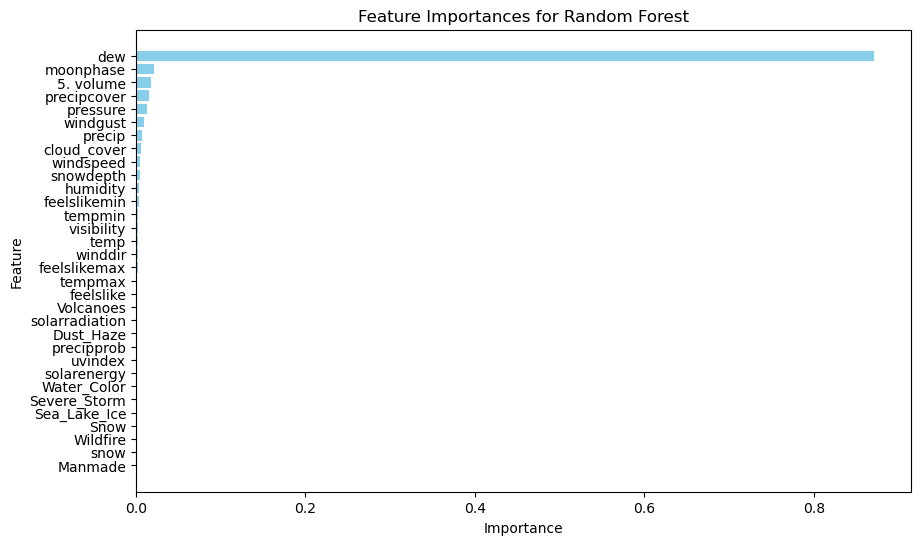

In [400]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print(feature_importances_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

#### Hyperparameter tuning on the Random Forest Model

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Random Forest - MSE: 0.005731903249231564, R²: 0.8105063284193785

Feature Importances for Tuned Random Forest:
           Feature  Importance
15             dew    0.875903
30       moonphase    0.028636
19     precipcover    0.013834
25        pressure    0.011700
22        windgust    0.011665
16        humidity    0.006216
0      cloud_cover    0.006147
17          precip    0.005105
23       windspeed    0.004820
21       snowdepth    0.004233
24         winddir    0.003627
13    feelslikemin    0.003421
11            temp    0.002975
1        Dust_Haze    0.002789
26      visibility    0.002707
12    feelslikemax    0.002627
10         tempmin    0.002402
9          tempmax    0.002244
4     Severe_Storm    0.001757
14       feelslike    0.001185
28     solarenergy    0.001053
27  solarradiation    0.001044
3     Sea_Lake_Ice    0.000869
7      Water_Color    0.000841
29  

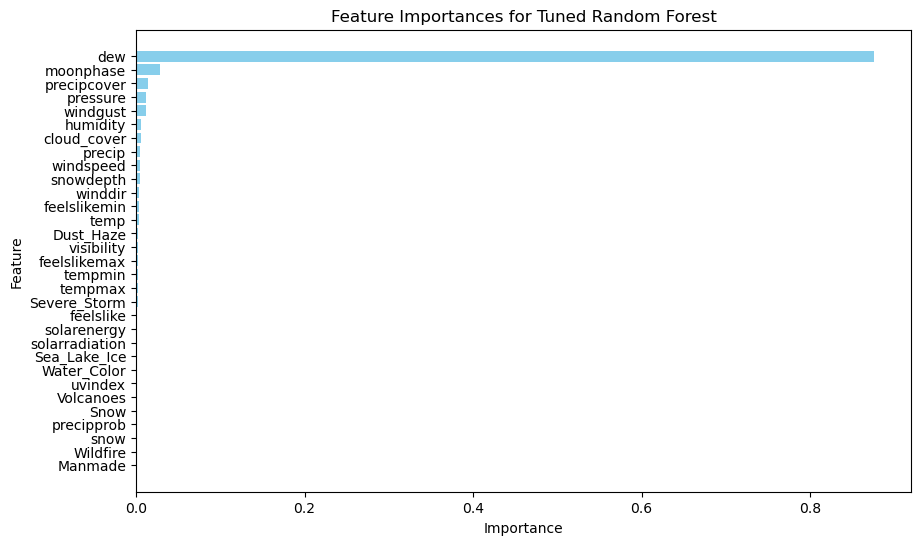

In [401]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the datasets
bond_data = pd.read_csv('./data/bond_data.csv')
cloud_cover_data = pd.read_csv('./data/cloud_cover_data.csv')
icon_counts = pd.read_csv('./data/icon_counts.csv')
weather_data = pd.read_csv('./data/weather_data.csv')

# Standardize date columns for merging
bond_data['date'] = pd.to_datetime(bond_data['date'])
cloud_cover_data['date'] = pd.to_datetime(cloud_cover_data['date'], dayfirst=True)
icon_counts['Date'] = pd.to_datetime(icon_counts['Date'])
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'], format='%d-%m-%Y')

# Rename columns to have a common 'date' column
icon_counts.rename(columns={'Date': 'date'}, inplace=True)
weather_data.rename(columns={'datetime': 'date'}, inplace=True)

# Merge datasets on the 'date' column
merged_data = pd.merge(bond_data, cloud_cover_data, on='date', how='inner', suffixes=('', '_cc'))
merged_data = pd.merge(merged_data, icon_counts, on='date', how='inner', suffixes=('', '_ic'))
merged_data = pd.merge(merged_data, weather_data, on='date', how='inner', suffixes=('', '_w'))

# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0', 'Unnamed: 0_cc', 'Unnamed: 0_ic', 'Unnamed: 0_w', 'symbol', '1. open', '2. high', '3. low', '5. volume']
columns_present = [col for col in columns_to_drop if col in merged_data.columns]
merged_data = merged_data.drop(columns=columns_present)

# Fill missing values
merged_data = merged_data.fillna(merged_data.mean())

# Split the data into features and target variable
X = merged_data.drop(columns=['date', '4. close'])
y = merged_data['4. close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the Random Forest model with the best parameters
rf_model_tuned = RandomForestRegressor(**best_params, random_state=42)
rf_model_tuned.fit(X_train, y_train)

# Make predictions
y_pred_rf_tuned = rf_model_tuned.predict(X_test)

# Evaluate the model
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print(f"Tuned Random Forest - MSE: {mse_rf_tuned}, R²: {r2_rf_tuned}")

# Get feature importances
feature_importances = rf_model_tuned.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print("\nFeature Importances for Tuned Random Forest:")
print(feature_importances_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Tuned Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

#### Hyperparameter tuning on the Neural Network

In [402]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor

# Load the datasets
bond_data = pd.read_csv('./data/bond_data.csv')
cloud_cover_data = pd.read_csv('./data/cloud_cover_data.csv')
icon_counts = pd.read_csv('./data/icon_counts.csv')
weather_data = pd.read_csv('./data/weather_data.csv')

# Standardize date columns for merging
bond_data['date'] = pd.to_datetime(bond_data['date'])
cloud_cover_data['date'] = pd.to_datetime(cloud_cover_data['date'], dayfirst=True)
icon_counts['Date'] = pd.to_datetime(icon_counts['Date'])
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'], format='%d-%m-%Y')

# Rename columns to have a common 'date' column
icon_counts.rename(columns={'Date': 'date'}, inplace=True)
weather_data.rename(columns={'datetime': 'date'}, inplace=True)

# Merge datasets on the 'date' column
merged_data = pd.merge(bond_data, cloud_cover_data, on='date', how='inner', suffixes=('', '_cc'))
merged_data = pd.merge(merged_data, icon_counts, on='date', how='inner', suffixes=('', '_ic'))
merged_data = pd.merge(merged_data, weather_data, on='date', how='inner', suffixes=('', '_w'))

# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0', 'Unnamed: 0_cc', 'Unnamed: 0_ic', 'Unnamed: 0_w', 'symbol']
columns_present = [col for col in columns_to_drop if col in merged_data.columns]
merged_data = merged_data.drop(columns=columns_present)

# Fill missing values
merged_data = merged_data.fillna(merged_data.mean())

# Split the data into features and target variable
X = merged_data.drop(columns=['date', '4. close'])
y = merged_data['4. close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 100), (50, 100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

# Initialize the MLP Regressor
mlp = MLPRegressor(max_iter=1000, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the MLP Regressor model with the best parameters
mlp_model_tuned = MLPRegressor(**best_params, max_iter=1000, random_state=42)
mlp_model_tuned.fit(X_train, y_train)

# Make predictions
y_pred_mlp_tuned = mlp_model_tuned.predict(X_test)

# Evaluate the model
mse_mlp_tuned = mean_squared_error(y_test, y_pred_mlp_tuned)
r2_mlp_tuned = r2_score(y_test, y_pred_mlp_tuned)

print(f"Mean Squared Error (MSE): {mse_mlp_tuned}")
print(f"R-squared (R²): {r2_mlp_tuned}")


Best Parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'lbfgs'}
Mean Squared Error (MSE): 0.03252496057856708
R-squared (R²): -0.07525789080161394


### Chaging our dependent variable, as predicting the bond price for the following day would be more beneficial for the investors

#### Models without using the enriched features derived from image processing i.e., just using the weather dataset
##### Dependent Variable: Bond closing price on the following day
##### Independent variables: From weather dataset - Temperature, pressure, humidity, etc...

In [403]:
import pandas as pd

# Load the datasets
bond_data = pd.read_csv('./data/bond_data.csv')
weather_data = pd.read_csv('./data/weather_data.csv')

# Display the first few rows of each dataset to understand their structure
bond_data_head = bond_data.head()
weather_data_head = weather_data.head()

bond_data_head, weather_data_head


(   Unnamed: 0        date  1. open  2. high  3. low  4. close  5. volume  \
 0          47  2024-03-28    46.92  46.9400   46.87     46.89    30292.0   
 1          48  2024-03-27    46.78  46.9400   46.78     46.94    35341.0   
 2          49  2024-03-26    46.76  46.8200   46.71     46.77    16702.0   
 3          50  2024-03-25    46.78  46.7857   46.72     46.73    20963.0   
 4          51  2024-03-22    46.89  46.8900   46.73     46.82    23818.0   
 
   symbol  
 0   BGRN  
 1   BGRN  
 2   BGRN  
 3   BGRN  
 4   BGRN  ,
    Unnamed: 0    datetime  tempmax  tempmin    temp  feelslikemax  \
 0         210  01-01-2024   57.325   47.500  52.500        57.125   
 1         211  02-01-2024   57.725   47.525  52.375        57.800   
 2         212  03-01-2024   57.775   47.300  52.425        57.900   
 3         213  04-01-2024   58.100   46.950  52.125        57.475   
 4         214  05-01-2024   54.850   43.975  48.725        52.925   
 
    feelslikemin  feelslike       dew  hu

In [404]:
# Standardize date columns for merging
bond_data['date'] = pd.to_datetime(bond_data['date'])
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'], format='%d-%m-%Y')

# Rename columns to have a common 'date' column
weather_data.rename(columns={'datetime': 'date'}, inplace=True)

# Merge datasets on the 'date' column
merged_data = pd.merge(bond_data, weather_data, on='date', how='inner')

# Drop unnecessary columns after merging
merged_data = merged_data.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'symbol'])

# Fill missing values (if any) with appropriate methods, such as mean or median
merged_data = merged_data.fillna(merged_data.mean())

# Add a lagged close column for prediction
merged_data['lagged_close'] = merged_data['4. close'].shift(1)

# Drop rows with NaN values created by the lagged column
merged_data = merged_data.dropna()

# Select features and target variable
X = merged_data.drop(columns=['date','1. open','2. high','3. low','4. close','lagged_close'])
y = merged_data['lagged_close']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((48, 23), (12, 23), (48,), (12,))

In [405]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Initialize models
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
nn = MLPRegressor(max_iter=1000)

# Train and predict with each model
models = {'Linear Regression': lr, 'Decision Tree': dt, 'Random Forest': rf, 'Gradient Boosting': gb, 'Neural Network': nn}
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse

results


{'Linear Regression': 0.022655773899588092,
 'Decision Tree': 0.03712499999999986,
 'Random Forest': 0.016277832894998928,
 'Gradient Boosting': 0.0214895987037501,
 'Neural Network': 10277.572892156128}

In [406]:
from sklearn.metrics import r2_score

# Initialize dictionary to store r-squared values
r_squared_results = {}

# Calculate r-squared for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r_squared_results[name] = r2

results, r_squared_results

({'Linear Regression': 0.022655773899588092,
  'Decision Tree': 0.03712499999999986,
  'Random Forest': 0.016277832894998928,
  'Gradient Boosting': 0.0214895987037501,
  'Neural Network': 10277.572892156128},
 {'Linear Regression': -1.506477751644709,
  'Decision Tree': -3.1072526121697077,
  'Random Forest': -0.8008665771972145,
  'Gradient Boosting': -1.377460213076274,
  'Neural Network': -1137038.4103184643})

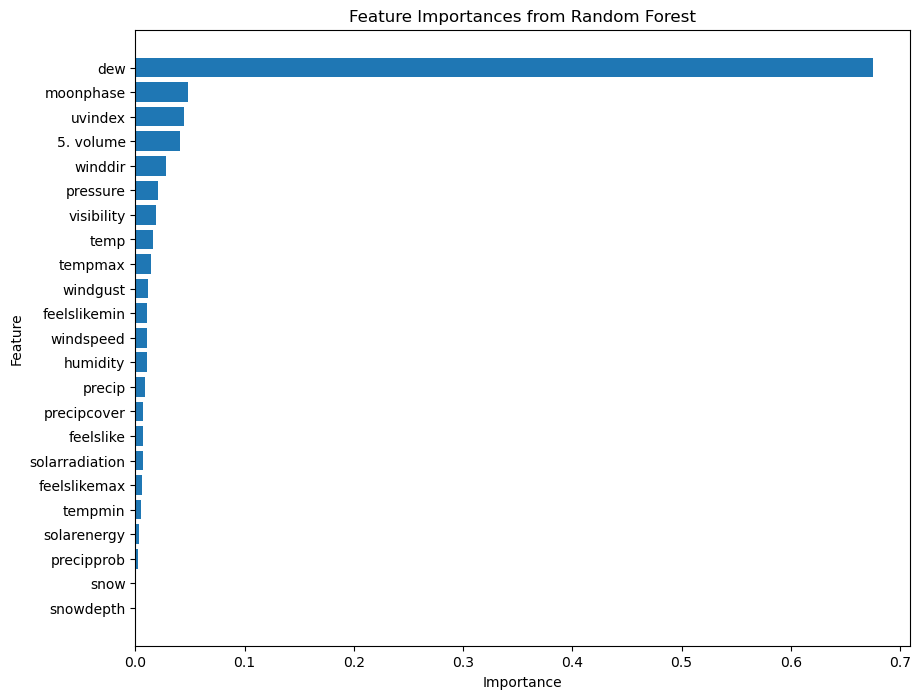

In [407]:
# Get feature importances
importances = rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()

#### Models including the enriched features derived from image processing i.e., natural disaster and cloud coverage features
##### Dependent Variable: Bond closing price on the following day
##### Independent variables: From weather dataset - Temperature, pressure, humidity, etc..., Natural disaster variables and Cloud coverage percentage

In [408]:
import pandas as pd

# Load the datasets
bond_data = pd.read_csv('./data/bond_data.csv')
cloud_cover_data = pd.read_csv('./data/cloud_cover_data.csv')
icon_counts = pd.read_csv('./data/icon_counts.csv')
weather_data = pd.read_csv('./data/weather_data.csv')

# Display the first few rows of each dataset to understand their structure
bond_data_head = bond_data.head()
cloud_cover_data_head = cloud_cover_data.head()
icon_counts_head = icon_counts.head()
weather_data_head = weather_data.head()

bond_data_head, cloud_cover_data_head, icon_counts_head, weather_data_head


(   Unnamed: 0        date  1. open  2. high  3. low  4. close  5. volume  \
 0          47  2024-03-28    46.92  46.9400   46.87     46.89    30292.0   
 1          48  2024-03-27    46.78  46.9400   46.78     46.94    35341.0   
 2          49  2024-03-26    46.76  46.8200   46.71     46.77    16702.0   
 3          50  2024-03-25    46.78  46.7857   46.72     46.73    20963.0   
 4          51  2024-03-22    46.89  46.8900   46.73     46.82    23818.0   
 
   symbol  
 0   BGRN  
 1   BGRN  
 2   BGRN  
 3   BGRN  
 4   BGRN  ,
    Unnamed: 0        date  cloud_cover
 0           0  01-01-2024       26.700
 1           1  02-01-2024       23.660
 2           2  03-01-2024       27.020
 3           3  04-01-2024       26.890
 4           4  05-01-2024       26.835,
    Unnamed: 0        Date  Dust_Haze  Manmade  Sea_Lake_Ice  Severe_Storm  \
 0           0  2024-01-01          0        0             0             1   
 1           1  2024-01-02          0        0             0      

In [409]:
# Standardize date columns for merging
bond_data['date'] = pd.to_datetime(bond_data['date'])
cloud_cover_data['date'] = pd.to_datetime(cloud_cover_data['date'], dayfirst=True)
icon_counts['Date'] = pd.to_datetime(icon_counts['Date'])
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'], format='%d-%m-%Y')

# Rename columns to have a common 'date' column
icon_counts.rename(columns={'Date': 'date'}, inplace=True)
weather_data.rename(columns={'datetime': 'date'}, inplace=True)

# Merge datasets on the 'date' column with suffixes to handle duplicate column names
merged_data = pd.merge(bond_data, cloud_cover_data, on='date', how='inner', suffixes=('', '_cc'))
merged_data = pd.merge(merged_data, icon_counts, on='date', how='inner', suffixes=('', '_ic'))
merged_data = pd.merge(merged_data, weather_data, on='date', how='inner', suffixes=('', '_w'))

# Drop unnecessary columns after merging
merged_data = merged_data.loc[:,~merged_data.columns.duplicated()]

# Display the first few rows of the merged dataset
merged_data_head = merged_data.head()

# Check for missing values
missing_values = merged_data.isnull().sum()

# Drop unnecessary columns
merged_data = merged_data.drop(columns=['Unnamed: 0', 'Unnamed: 0_cc', 'Unnamed: 0_ic', 'Unnamed: 0_w', 'symbol'])

# Fill missing values (if any) with appropriate methods, such as mean or median
merged_data = merged_data.fillna(merged_data.mean())

# Display the cleaned dataset
missing_values_after_cleaning = merged_data.isnull().sum()
merged_data_head, missing_values, missing_values_after_cleaning


(   Unnamed: 0       date  1. open  2. high  3. low  4. close  5. volume  \
 0          47 2024-03-28    46.92  46.9400   46.87     46.89    30292.0   
 1          48 2024-03-27    46.78  46.9400   46.78     46.94    35341.0   
 2          49 2024-03-26    46.76  46.8200   46.71     46.77    16702.0   
 3          50 2024-03-25    46.78  46.7857   46.72     46.73    20963.0   
 4          51 2024-03-22    46.89  46.8900   46.73     46.82    23818.0   
 
   symbol  Unnamed: 0_cc  cloud_cover  ...  snowdepth  windgust  windspeed  \
 0   BGRN             87     26.86000  ...        0.0    29.275     16.875   
 1   BGRN             86     26.76500  ...        0.0    30.250     17.225   
 2   BGRN             85     26.75285  ...        0.0    26.150     16.225   
 3   BGRN             84     26.33000  ...        0.0    23.475     12.400   
 4   BGRN             81     26.73505  ...        0.0    22.750     11.525   
 
    winddir  pressure  visibility  solarradiation  solarenergy  uvindex 

In [410]:
# Create lagged target variable
merged_data['lagged_close'] = merged_data['4. close'].shift(-1)

# Drop the last row as it will have NaN in lagged_close
merged_data = merged_data.dropna()

# Select features and target variable
X = merged_data.drop(columns=['date', '1. open', '2. high', '3. low', '4. close', 'lagged_close'])
y = merged_data['lagged_close']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Re-initialize models
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
nn = MLPRegressor(random_state=42, max_iter=500)

# Train and predict with each model
models = {'Linear Regression': lr, 'Decision Tree': dt, 'Random Forest': rf, 'Gradient Boosting': gb, 'Neural Network': nn}
results_with_lag = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results_with_lag[name] = {'MSE': mse, 'R2': r2}

results_with_lag


{'Linear Regression': {'MSE': 0.03204085229872845, 'R2': -2.394009874198723},
 'Decision Tree': {'MSE': 0.030889479999999636, 'R2': -2.2720477954646445},
 'Random Forest': {'MSE': 0.005173794503998631, 'R2': 0.45195248022964407},
 'Gradient Boosting': {'MSE': 0.007639643429870904, 'R2': 0.1907510763261362},
 'Neural Network': {'MSE': 162123.00736506624, 'R2': -17173296.47354017}}

As random forest is performing well among all the models, we are performing hyperparameter tuning

In [411]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the best model with the training data
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the best model
best_mse = mean_squared_error(y_test, y_pred)
best_r2 = r2_score(y_test, y_pred)

best_params, best_score, best_mse, best_r2


Fitting 3 folds for each of 216 candidates, totalling 648 fits


({'bootstrap': True,
  'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 50},
 0.5355525708416332,
 0.005224104632000207,
 0.44662325023234073)

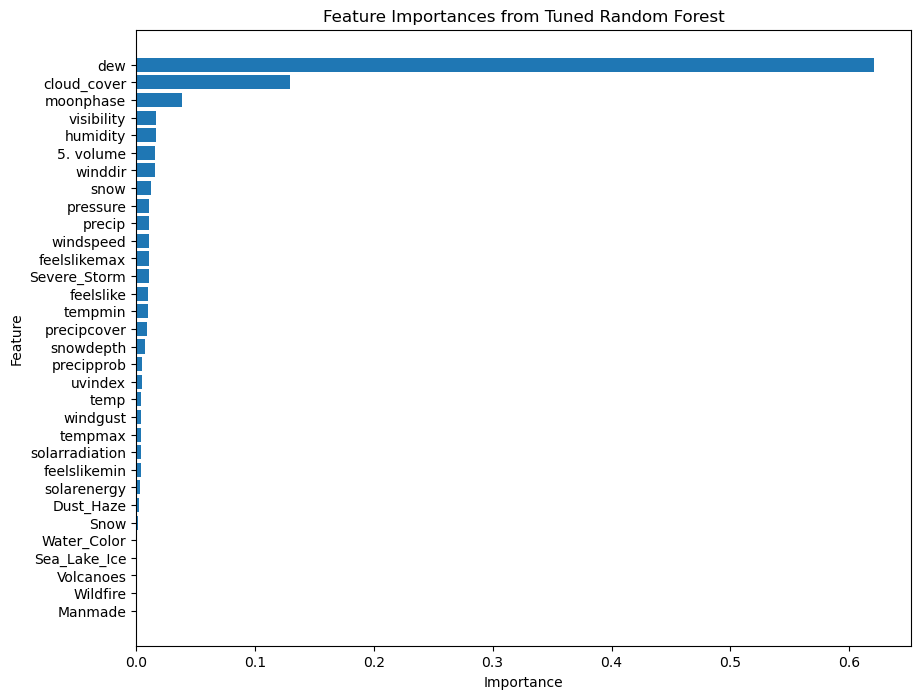

In [412]:
# Get feature importances
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Tuned Random Forest')
plt.gca().invert_yaxis()
plt.show()

## Key Observations:
#### 1. Random Forest is the best performing model with and R-squared value of 45%
#### 2. The model with the enriched features(natural disasters and cloud cover % features) outperforms the model without using the enriched features
#### 3. The cloud cover turns out to be the 2nd most important feature in the model, 
#### Points 2 & 3 indicate the importance of image processing to extract the features and enhancing the model performance 